In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import rc  ### 이 줄
# import scienceplots

# plt.rcParams['font.family'] = 'NanumGothic' # 'AppleGothic' # 폰트 변경
plt.rcParams['axes.unicode_minus'] = False # 축 값 마이너스 깨짐 해결

from datetime import datetime

# import warnings
# warnings.filterwarnings("ignore")

# plt.style.use('seaborn-deep')
# plt.style.use(['science'])
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

%matplotlib inline

In [2]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()

In [3]:
from sdv.single_table import TVAESynthesizer

# synthesizer = TVAESynthesizer.load(
#     filepath='model/trained_disaster_1024.pkl'
# )

synthetic_data = pd.read_csv('data/synthetic_data_clean.csv')
original_data = pd.read_csv('data/original_data_clean.csv')

In [4]:
metadata.detect_from_dataframe(data=synthetic_data)
metadata

{
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1",
    "columns": {
        "tweet_id": {
            "sdtype": "numerical"
        },
        "text_info": {
            "sdtype": "categorical"
        },
        "text_info_conf": {
            "sdtype": "numerical"
        },
        "text_human": {
            "sdtype": "categorical"
        },
        "text_human_conf": {
            "sdtype": "numerical"
        },
        "tweet_text": {
            "sdtype": "categorical"
        },
        "category": {
            "sdtype": "categorical"
        },
        "text_clean": {
            "sdtype": "categorical"
        }
    }
}

In [5]:
synthetic_data = synthetic_data.dropna(axis=0)
original_data = original_data.dropna(axis=0)

In [6]:
import os
import re

import numpy as np
import tensorflow as tf

np.random.seed(1)
tf.set_random_seed(2)

import pandas as pd
import keras
# from tqdm import tqdm
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from sklearn.metrics import f1_score, classification_report, log_loss

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Bidirectional, Flatten
from keras.layers import Dropout, Conv1D, GlobalMaxPool1D, GRU, GlobalAvgPool1D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

2023-10-14 16:40:27.618978: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-14 16:40:27.636184: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-14 16:40:27.636201: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-14 16:40:27.636212: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-14 16:40:27.639654: I tensorflow/core/platform/cpu_feature_g

AttributeError: module 'tensorflow' has no attribute 'set_random_seed'

In [18]:
original_data.drop_duplicates(['tweet_text'], inplace=True)

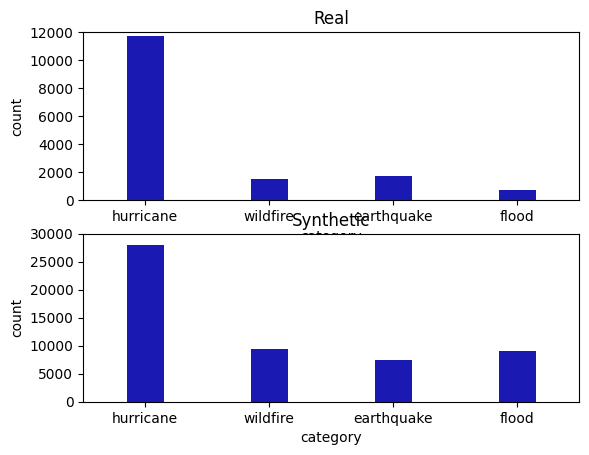

In [19]:
import seaborn as sns

fig, ax =plt.subplots(2,1)
sns.countplot(data=original_data, x='category', ax=ax[0], color='#0000CD', width=0.3).set_title('Real')
sns.countplot(data=synthetic_data, x='category', ax=ax[1], color='#0000CD', width=0.3).set_title('Synthetic')

fig.show()

In [7]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup

%matplotlib inline

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/wise/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from sklearn.metrics import f1_score, classification_report, log_loss

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Bidirectional, Flatten
from keras.layers import Dropout, Conv1D, GlobalMaxPool1D, GRU, GlobalAvgPool1D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [25]:
X = synthetic_data.text_clean
y = synthetic_data.category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
my_tags=['hurricane', 'wildfire', 'earthquake', 'flood']

In [26]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', RandomForestClassifier(n_estimators=100, random_state=42)),
              ])
nb.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.827174249458372
              precision    recall  f1-score   support

   hurricane       0.73      0.57      0.64      2229
    wildfire       0.82      0.81      0.81      2715
  earthquake       0.85      0.91      0.88      8351
       flood       0.82      0.80      0.81      2860

    accuracy                           0.83     16155
   macro avg       0.80      0.77      0.79     16155
weighted avg       0.82      0.83      0.82     16155



In [ ]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup

%matplotlib inline

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/wise/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
original_data['tweet_text'] = original_data['tweet_text'].apply(clean_text)
original_data['tweet_text']

0        congrats hitting yoir goal guys im sure victim...
1        rt ajwamood #ajwamood harvey first major hurri...
5        rt yiieza get back schs harvey hits https tco ...
9        always good city shows severe weather map 7a #...
10       rt msnbc side side satellite images compare si...
                               ...                        
18077         get mora try whole menu https tco we0jhsl5pc
18078    mirka mora b1928 noted frenchborn australian c...
18079    paulmalignaggi lol u sergio mora didnt horn wi...
18080    #cameroon 4 #female suicide #bombers kill 1 mo...
18081    rt saakey6251413 happened visit #cyclonemora b...
Name: tweet_text, Length: 15646, dtype: object

In [35]:
X = original_data.tweet_text
y = original_data.category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
my_tags=['hurricane', 'wildfire', 'earthquake', 'flood']

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', RandomForestClassifier(n_estimators=100, random_state=42)),
              ])
nb.fit(X_train, y_train)


from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.985939497230507
              precision    recall  f1-score   support

   hurricane       0.99      0.97      0.98       466
    wildfire       1.00      0.90      0.95       237
  earthquake       0.98      1.00      0.99      3550
       flood       0.99      0.95      0.97       441

    accuracy                           0.99      4694
   macro avg       0.99      0.95      0.97      4694
weighted avg       0.99      0.99      0.99      4694



In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.python.client import device_lib
tf.test.gpu_device_name()

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates